Connecting to Kaggle

In [26]:
! pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           2747         80  1.0              
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-06 08:55:25          19128        535  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                     3MB  2022-11-16 13:52:31        

downloading the dataset

In [2]:
!kaggle datasets download -d cihan063/autism-image-data

 94% 216M/229M [00:02<00:00, 196MB/s]
100% 229M/229M [00:02<00:00, 86.7MB/s]


In [ ]:
!unzip autism-image-data

Importing the required Libraries

In [4]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,save_img


In [5]:
# Creating file path for our train data and test data
train_dir = "/content/AutismDataset/train"
test_dir = "/content/AutismDataset/test"

In [6]:
#Creating new Directories
import os.path
from os import path

if path.exists('/content/Train') == False:
  os.mkdir('/content/Train')


if path.exists('/content/Train/Autistic') == False:
  os.mkdir('/content/Train/Autistic')

if path.exists('/content/Train/Non_Autistic') == False:
  os.mkdir('/content/Train/Non_Autistic')

In [7]:
#adding data to newly created directories
train_non_autistic = []
train_autistic = []
for i in os.listdir(train_dir):
    if 'Non_Autistic' in ("/content/AutismDataset/train/{}".format(i)):
        train_non_autistic.append(("/content/AutismDataset/train/{}".format(i)))
        non_autistic = load_img('/content/AutismDataset/train/{}'.format(i))
        save_img("/content/Train/Non_Autistic/{}".format(i),non_autistic)
    else:
        train_autistic.append(("/content/AutismDataset/train/{}".format(i)))
        autistic = load_img('/content/AutismDataset/train/{}'.format(i))
        save_img("/content/Train/Autistic/{}".format(i),autistic)
        


In [8]:
#New training data path
new_training = "/content/Train"

Data Argumentation:

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 10,
                                  # width_shift_range = 0.2,
                                  # height_shift_range = 0.2,
                                  shear_range = 0.1,
                                  #horizontal_flip = True,
                                  #vertical_flip = True,
                                  zoom_range = 0.1)


val_datagen = ImageDataGenerator(rescale = 1./255,
                                 rotation_range=15,
                                  zoom_range = 0.1,
                                 fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    new_training,
    target_size = (224,224),
    #color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    class_mode= 'binary',
    seed = 123,
    )

validation_generator = val_datagen.flow_from_directory(
    "/content/AutismDataset/valid",
    target_size = (224,224),
    #color_mode = 'rgb',
    batch_size = 48,
    shuffle = True,
    class_mode= 'binary',
    seed = 123,
    )

Found 2540 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Model:

In [27]:
from keras.optimizers import Adam
classifier = Sequential()

# Convolution layers
classifier.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(layers.Dropout(0.25))


classifier.add(Conv2D(64, (3, 3),padding="same",activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(layers.Dropout(0.25))


classifier.add(layers.BatchNormalization())
classifier.add(layers.ZeroPadding2D(padding=(3, 3)))
classifier.add(layers.Conv2D(filters = 128, kernel_size = (11,11), strides = (2,2), padding = "valid"))
#classifier.add(layers.Dense(128, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(layers.Dropout(0.5))
classifier.add(layers.BatchNormalization())
#classifier.add(layers.Dense(256,activation = 'relu'))


# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))



In [28]:
# Compiling the CNN
classifier.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

Summary of the Model

In [29]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 110, 110, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                  

Model Training:

In [13]:
history = classifier.fit(train_generator,
                              epochs=50,
                              validation_data=validation_generator,
                              workers=4
                             )

Epoch 1/50
80/80 [==============================] - 44s 382ms/step - loss: 0.6875 - accuracy: 0.6260 - val_loss: 0.6168 - val_accuracy: 0.7200
Epoch 2/50
80/80 [==============================] - 29s 350ms/step - loss: 0.6159 - accuracy: 0.6728 - val_loss: 0.7438 - val_accuracy: 0.5300
Epoch 3/50
80/80 [==============================] - 29s 358ms/step - loss: 0.5841 - accuracy: 0.6941 - val_loss: 1.3429 - val_accuracy: 0.5300
Epoch 4/50
80/80 [==============================] - 30s 349ms/step - loss: 0.5493 - accuracy: 0.7091 - val_loss: 1.1662 - val_accuracy: 0.5000
Epoch 5/50
80/80 [==============================] - 31s 380ms/step - loss: 0.5372 - accuracy: 0.7252 - val_loss: 0.5631 - val_accuracy: 0.6800
Epoch 6/50
80/80 [==============================] - 29s 347ms/step - loss: 0.4822 - accuracy: 0.7626 - val_loss: 1.4600 - val_accuracy: 0.5700
Epoch 7/50
80/80 [==============================] - 29s 347ms/step - loss: 0.4977 - accuracy: 0.7500 - val_loss: 0.8371 - val_accuracy: 0.5800

Plot Accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


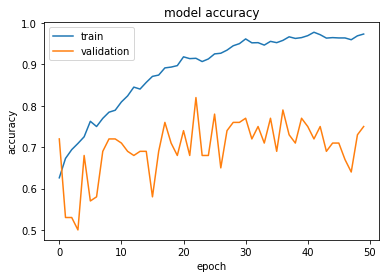

In [14]:
# Print out the metrics recorded during training (saved in the history)
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Plot Loss

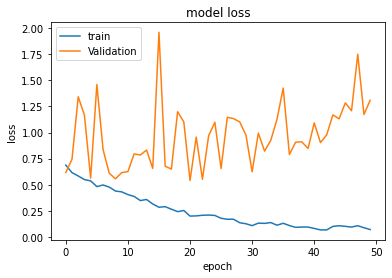

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

Save the Model to an H5 File

In [16]:
classifier.save("/content/Autism_Classification.h5")

#Downloading the file:
from google.colab import files
files.download("/content/Autism_Classification.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# load model
autism_Classification = tf.keras.models.load_model('/content/Autism_Classification.h5')
# summarize model.
autism_Classification.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 110, 110, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                    

Printing the Classes:

In [18]:
train_generator.class_indices

{'Autistic': 0, 'Non_Autistic': 1}

Prediction:

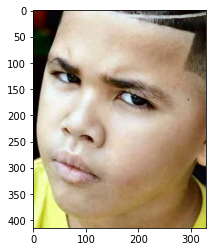

1/1 [==============================] - 0s 310ms/step
Non Autistic


In [19]:
training_image = "/content/AutismDataset/valid/Non_Autistic/01.jpg"
test_image = tf.keras.utils.load_img(training_image, target_size= (224,224))
img=mpimg.imread(training_image)
imgplot = plt.imshow(img)
plt.show()
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = autism_Classification.predict(test_image)

if result [0][0] == 1:
  prediction = 'Non Autistic'
else:
  prediction = 'Autistic'


print(prediction)

Front end Using Streamlit:

In [20]:
!pip install streamlit
!pip install streamlit_bokeh_events

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 27.5 MB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 4.7 MB 67.7 MB/s 
     |████████████████████████████████| 237 kB 75.0 MB/s 
     |████████████████████████████████| 164 kB 62.9 MB/s 
     |████████████████████████████████| 182 kB 68.6 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 51 kB 7.6 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=89f384b6b514a8dcba187672ea8437c1210f1515d98256dc495e3cadac5dd5be
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 

In [21]:
import streamlit as st
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps
from bokeh.models.widgets import Button
from bokeh.models import CustomJS


In [22]:
%%writefile app.py
html_temp = """ 
AUTISM DETECTION  ⚕️⚕️⚕️
""" 
st.markdown(html_temp, unsafe_allow_html=True) 
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('Autism_Classification.h5')
  return model

with st.spinner('Model is being loaded..'):
  model=load_model()
file = st.file_uploader("Please upload any image from the local machine in case of computer or upload camera image in case of mobile.", type=["jpg", "png","jpeg"])
import cv2
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)

if file is None:
  st.text("Please upload an image file within the allotted file size")
else:
  img = Image.open(file)
  st.image(img, use_column_width=False)
  size = (224,224)    
  image = ImageOps.fit(img, size, Image.ANTIALIAS)
  imag = tf.keras.utils.img_to_array(image)
  imaga = np.expand_dims(imag,axis=0)
  predictions = model.predict(imaga)
  a=predictions[0][0]
  if a==0:
    st.error('AUTISM.')
  elif a==1:
    st.success('Non AUTISM.') 
    

Writing app.py
